In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the indices, seasons, and years
indices = ['TIRS1', 'SWIR2', 'SWIR1', 'NIR', 'SAVI', 'NDVI', 'MSAVI2', 'NDSI2', 'MSI', 'NDWI', 'GNDVI', 'EVI', 'LST', 'NDMI', 'MNDWI']
seasons = ['spring', 'summer', 'fall']  # Seasons used for feature gathering
years = range(2014, 2022)  # Data for training from 2013 to 2021, labels from 2014 to 2022

# Initialize an empty DataFrame to store features and labels
column_names = ['year'] + [f'{season}_{index}' for season in seasons for index in indices] + ['TVDI']
data_df = pd.DataFrame(columns=column_names)

for year in years:
    # Initialize a list to gather data for the current year across all pixels
    current_year_data = []

    # Gather data from the previous year's Summer and Fall
    previous_year = year - 1
    for season in ['summer', 'fall']:
        for index in indices:
            data_path = f'./Landsat8_SR_{index}/{index}_{previous_year}_{season}_mean.npy'
            data_array = np.load(data_path)[100:-100,100:-60]
            current_year_data.append(data_array.flatten())

    # Gather data from the current year's Spring
    for index in indices:
        data_path = f'./Landsat8_SR_{index}/{index}_{year}_spring_mean.npy'
        data_array = np.load(data_path)[100:-100,100:-60]
        current_year_data.append(data_array.flatten())

    # Load the label (TVDI of the current year's summer)
    label_path = f'./Landsat8_SR_TVDI/TVDI_{year}_summer_mean.npy'
    label_array = np.load(label_path)[100:-100,100:-60].flatten()

    # Ensure all data entries are the same length (smallest of the datasets)
    min_length = min(map(len, current_year_data + [label_array]))
    current_year_data = [d[:min_length] for d in current_year_data]
    label_array = label_array[:min_length]

    # Transpose to get a list of pixels, where each pixel contains all data from indices and seasons
    current_year_data = np.array(current_year_data).T  # Transpose to switch between pixels and features

    # Prepare the full data for the current year to append to the main DataFrame
    full_data = np.hstack([np.full((len(current_year_data), 1), year), current_year_data, label_array[:, None]])  # Append label as a new column to the right
    current_df = pd.DataFrame(full_data, columns=column_names)
    data_df = pd.concat([data_df, current_df], ignore_index=True)

# Convert year column to int
data_df['year'] = data_df['year'].astype(int)

# Drop rows with NaN values (if any)
data_df.dropna(inplace=True)
# drop the first column (date)
data_df.drop(data_df.columns[0], axis=1, inplace=True)
# drop rows with NDVI values < 0.2
data_df = data_df[data_df['spring_NDVI'] >= 0.2]
data_df = data_df[data_df['summer_NDVI'] >= 0.2]
data_df = data_df[data_df['fall_NDVI'] >= 0.2]

# drop rows of indices columns with values >1 and <-1, except for TIRS1, SWIR2, SWIR1, NIR, LST of 3 seasons
data_df = data_df[(data_df['spring_SAVI'] <= 1) & (data_df['spring_SAVI'] >= -1)]
data_df = data_df[(data_df['summer_SAVI'] <= 1) & (data_df['summer_SAVI'] >= -1)]
data_df = data_df[(data_df['fall_SAVI'] <= 1) & (data_df['fall_SAVI'] >= -1)]
data_df = data_df[(data_df['spring_NDVI'] <= 1) & (data_df['spring_NDVI'] >= -1)]
data_df = data_df[(data_df['summer_NDVI'] <= 1) & (data_df['summer_NDVI'] >= -1)]
data_df = data_df[(data_df['fall_NDVI'] <= 1) & (data_df['fall_NDVI'] >= -1)]
data_df = data_df[(data_df['spring_MSAVI2'] <= 1) & (data_df['spring_MSAVI2'] >= -1)]
data_df = data_df[(data_df['summer_MSAVI2'] <= 1) & (data_df['summer_MSAVI2'] >= -1)]
data_df = data_df[(data_df['fall_MSAVI2'] <= 1) & (data_df['fall_MSAVI2'] >= -1)]
data_df = data_df[(data_df['spring_NDSI2'] <= 1) & (data_df['spring_NDSI2'] >= -1)]
data_df = data_df[(data_df['summer_NDSI2'] <= 1) & (data_df['summer_NDSI2'] >= -1)]
data_df = data_df[(data_df['fall_NDSI2'] <= 1) & (data_df['fall_NDSI2'] >= -1)]
data_df = data_df[(data_df['spring_MSI'] <= 1) & (data_df['spring_MSI'] >= -1)]
data_df = data_df[(data_df['summer_MSI'] <= 1) & (data_df['summer_MSI'] >= -1)]
data_df = data_df[(data_df['fall_MSI'] <= 1) & (data_df['fall_MSI'] >= -1)]
data_df = data_df[(data_df['spring_NDWI'] <= 1) & (data_df['spring_NDWI'] >= -1)]
data_df = data_df[(data_df['summer_NDWI'] <= 1) & (data_df['summer_NDWI'] >= -1)]
data_df = data_df[(data_df['fall_NDWI'] <= 1) & (data_df['fall_NDWI'] >= -1)]
data_df = data_df[(data_df['spring_GNDVI'] <= 1) & (data_df['spring_GNDVI'] >= -1)]
data_df = data_df[(data_df['summer_GNDVI'] <= 1) & (data_df['summer_GNDVI'] >= -1)]
data_df = data_df[(data_df['fall_GNDVI'] <= 1) & (data_df['fall_GNDVI'] >= -1)]
data_df = data_df[(data_df['spring_EVI'] <= 1) & (data_df['spring_EVI'] >= -1)]
data_df = data_df[(data_df['summer_EVI'] <= 1) & (data_df['summer_EVI'] >= -1)]
data_df = data_df[(data_df['fall_EVI'] <= 1) & (data_df['fall_EVI'] >= -1)]
data_df = data_df[(data_df['spring_NDMI'] <= 1) & (data_df['spring_NDMI'] >= -1)]
data_df = data_df[(data_df['summer_NDMI'] <= 1) & (data_df['summer_NDMI'] >= -1)]
data_df = data_df[(data_df['fall_NDMI'] <= 1) & (data_df['fall_NDMI'] >= -1)]
data_df = data_df[(data_df['spring_MNDWI'] <= 1) & (data_df['spring_MNDWI'] >= -1)]
data_df = data_df[(data_df['summer_MNDWI'] <= 1) & (data_df['summer_MNDWI'] >= -1)]
data_df = data_df[(data_df['fall_MNDWI'] <= 1) & (data_df['fall_MNDWI'] >= -1)]


# Split data into features and labels
X = data_df.drop('TVDI', axis=1)
y = data_df['TVDI']





C:\Users\xxiezh\AppData\Local\Temp\ipykernel_67032\411264745.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_df = pd.concat([data_df, current_df], ignore_index=True)


In [2]:
# convert to smaller size
X_32 = X.astype(np.float32)
X_32

,spring_TIRS1,spring_SWIR2,spring_SWIR1,spring_NIR,spring_SAVI,spring_NDVI,spring_MSAVI2,spring_NDSI2,spring_MSI,spring_NDWI,...,fall_NDVI,fall_MSAVI2,fall_NDSI2,fall_MSI,fall_NDWI,fall_GNDVI,fall_EVI,fall_LST,fall_NDMI,fall_MNDWI
1,293.105438,0.068712,0.104269,0.155098,0.243222,0.566962,0.206409,0.220790,0.678543,-0.514446,...,0.450306,0.174537,0.250355,0.839639,-0.440415,0.440415,0.201972,18.160418,0.099738,-0.361353
2,293.213593,0.075102,0.135272,0.209632,0.336547,0.679732,0.304268,0.289316,0.641575,-0.609637,...,0.591560,0.271541,0.252864,0.776418,-0.570748,0.570748,0.304280,18.701912,0.136533,-0.475755
3,295.052551,0.087668,0.159929,0.279165,0.429269,0.762306,0.414478,0.302934,0.557955,-0.680173,...,0.662285,0.340545,0.282911,0.729638,-0.623794,0.623794,0.374674,19.730328,0.170518,-0.513121
4,295.723053,0.092316,0.180059,0.328005,0.481547,0.766814,0.477085,0.330626,0.546186,-0.683453,...,0.682733,0.401621,0.315621,0.649956,-0.657755,0.657755,0.429496,20.684547,0.223481,-0.515087
5,295.962341,0.103472,0.208315,0.362622,0.506809,0.756050,0.508728,0.342620,0.573804,-0.681992,...,0.703417,0.445991,0.333291,0.600365,-0.681171,0.681171,0.473519,20.913273,0.260112,-0.516904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860338,295.767334,0.045834,0.102889,0.360764,0.556816,0.857491,0.585629,0.383164,0.293580,-0.776403,...,0.750077,0.403080,0.288281,0.400626,-0.721106,0.721106,0.426743,8.901003,0.436364,-0.434722
5860339,296.761993,0.064923,0.134490,0.378848,0.558812,0.827172,0.589865,0.348216,0.370128,-0.761791,...,0.560935,0.263184,0.211199,0.775316,-0.577444,0.577444,0.291489,10.097883,0.137292,-0.478452
5860340,297.582306,0.078339,0.141613,0.328687,0.480785,0.750528,0.485442,0.291194,0.443921,-0.707123,...,0.500738,0.208349,0.199187,0.874569,-0.514280,0.514280,0.238006,10.981208,0.070767,-0.458797
5860341,296.888947,0.073806,0.133555,0.317024,0.467049,0.743210,0.467169,0.290758,0.430962,-0.706444,...,0.472352,0.190217,0.182564,0.892853,-0.487607,0.487607,0.219015,10.367398,0.060168,-0.438997


In [3]:
y_32 = y.astype(np.float32)
y_32

1          0.366784
2          0.362542
3          0.463654
4          0.504412
5          0.512734
             ...   
5860338    0.492691
5860339    0.548475
5860340    0.669729
5860341    0.644883
5860343    0.652255
Name: TVDI, Length: 3841691, dtype: float32

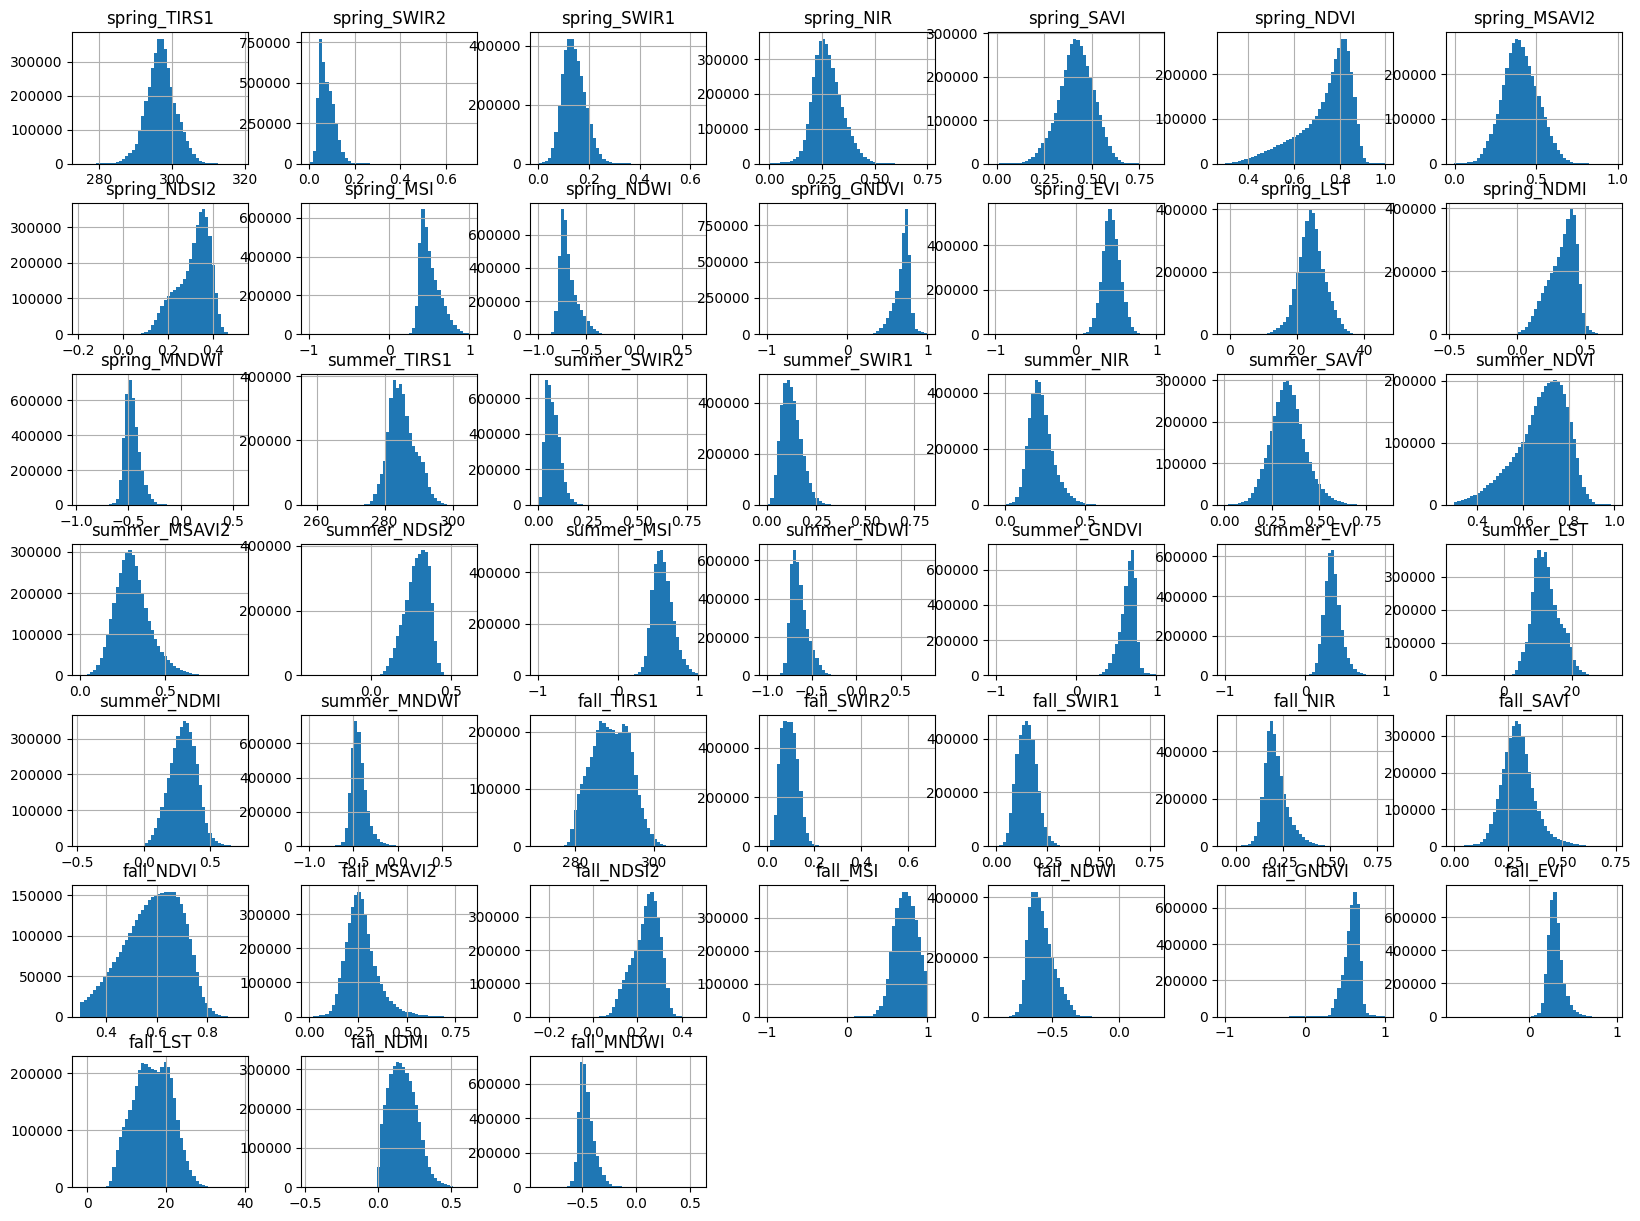

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
X_32.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots") #Here we use the function we defined above
plt.show()

In [44]:
# simple model try-out
# # Split the dataset into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Example: Using RandomForest for prediction
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_val)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.007223592708376774
R² Score: 0.7981648683239628


In [47]:
# simple try-out, seems overfitting 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded your data and split it into X_train, X_val, y_train, y_val

# Initialize the RandomForest model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Predict on the validation data
y_val_pred = model.predict(X_val)

# Calculate MSE and R-squared for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for validation data
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the metrics
print(f"Training MSE: {mse_train:.3f}")
print(f"Training R²: {r2_train:.3f}")
print(f"Validation MSE: {mse_val:.3f}")
print(f"Validation R²: {r2_val:.3f}")



Training MSE: 0.001
Training R²: 0.963
Validation MSE: 0.007
Validation R²: 0.798


In [48]:
#scalling and cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

# Split the data (assuming X, y are already defined and contain all data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on training and validation
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_val)

# Calculate MSE and R-squared for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for validation data
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the metrics
print(f"Training MSE: {mse_train:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Validation MSE: {mse_val:.4f}")
print(f"Validation R²: {r2_val:.4f}")




Training MSE: 0.0009
Training R²: 0.9745
Validation MSE: 0.0065
Validation R²: 0.8191


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\_parallel_backends.py", line 273, in _wrap_func_call
    return func()
           ^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 589, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 589, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\utils\parallel.py", line 129, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\ensemble\_forest.py", line 192, in _parallel_build_trees
    tree._fit(
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\tree\_classes.py", line 472, in _fit
    builder.build(self.tree_, X, y, sample_weight, missing_values_in_feature_mask)
  File "sklearn\\tree\\_tree.pyx", line 166, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\\tree\\_tree.pyx", line 285, in sklearn.tree._tree.DepthFirstTreeBuilder.build
  File "sklearn\\tree\\_tree.pyx", line 940, in sklearn.tree._tree.Tree._add_node
  File "sklearn\\tree\\_tree.pyx", line 908, in sklearn.tree._tree.Tree._resize_c
  File "sklearn\\tree\\_utils.pyx", line 35, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 134217728 bytes
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\utils\parallel.py", line 67, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 1952, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 1595, in _get_outputs
    yield from self._retrieve()
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 1699, in _retrieve
    self._raise_error_fast()
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 1734, in _raise_error_fast
    error_job.get_result(self.timeout)
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 736, in get_result
    return self._return_or_raise()
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\parallel.py", line 754, in _return_or_raise
    raise self._result
MemoryError: could not allocate 134217728 bytes

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\preprocessing\_data.py", line 997, in partial_fit
    self.mean_, self.var_, self.n_samples_seen_ = _incremental_mean_and_var(
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\utils\extmath.py", line 1116, in _incremental_mean_and_var
    X_nan_mask = np.isnan(X)
                 ^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 256. MiB for an array with shape (5828475, 46) and data type bool

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\preprocessing\_data.py", line 997, in partial_fit
    self.mean_, self.var_, self.n_samples_seen_ = _incremental_mean_and_var(
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\xxiezh\OneDrive - University of Gothenburg\PhD topic\urban tree project\.urban_env\Lib\site-packages\sklearn\utils\extmath.py", line 1143, in _incremental_mean_and_var
    temp = X - T
           ~~^~~
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 2.00 GiB for an array with shape (5828476, 46) and data type float64


In [3]:
# Example of converting data to float32
X_32 = X.astype(np.float32)
X_32

,year,spring_TIRS1,spring_SWIR2,spring_SWIR1,spring_NIR,spring_SAVI,spring_NDVI,spring_MSAVI2,spring_NDSI2,spring_MSI,...,fall_NDVI,fall_MSAVI2,fall_NDSI2,fall_MSI,fall_NDWI,fall_GNDVI,fall_EVI,fall_LST,fall_NDMI,fall_MNDWI
743,2014.0,295.580658,0.074047,0.158582,0.338083,0.498513,0.829942,0.501951,0.394421,0.439041,...,0.682747,0.477829,0.221020,0.656057,-0.642342,0.642342,0.519457,22.191835,0.221020,-0.495311
744,2014.0,296.453369,0.075504,0.160085,0.356655,0.510168,0.847477,0.512624,0.426242,0.410674,...,0.738779,0.559976,0.284264,0.574251,-0.682907,0.682907,0.597547,22.868685,0.284264,-0.498229
745,2014.0,296.419189,0.076595,0.151624,0.304167,0.451867,0.819337,0.442942,0.354125,0.480285,...,0.755222,0.580829,0.319395,0.530156,-0.696159,0.696159,0.625038,22.625393,0.319395,-0.488197
746,2014.0,295.663818,0.075486,0.134180,0.244162,0.375694,0.776958,0.359708,0.237064,0.631355,...,0.822906,0.678771,0.404616,0.431481,-0.741352,0.741352,0.743102,21.855438,0.404616,-0.485873
747,2014.0,295.172760,0.063542,0.123299,0.284944,0.433131,0.811127,0.437283,0.324087,0.530173,...,0.833956,0.703678,0.426645,0.408711,-0.749260,0.749260,0.781361,21.714924,0.426645,-0.480143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597403,2021.0,291.339355,0.002554,0.002213,-0.001307,-0.002044,-0.532026,-0.001360,-0.794725,-2.048635,...,-0.024698,-0.001852,-0.539851,-0.116793,0.567744,-0.974972,-0.002681,5.001440,-0.539851,0.577064
8598210,2021.0,291.294220,0.002570,0.002345,-0.000950,-0.000194,0.020612,-0.000129,-0.420978,-0.995533,...,-0.101609,-0.000062,-0.292512,-1.067531,0.320152,-0.744418,-0.000329,4.275950,-0.292512,0.468569
8598211,2021.0,290.950378,0.036280,0.031981,0.047152,0.022504,0.148983,0.018775,0.210682,0.016436,...,-0.937984,-0.003545,-0.955936,-51.143829,0.987254,-1.163550,-0.004826,6.919057,-0.955936,0.507472
8598212,2021.0,290.869476,0.023887,0.017323,0.025830,0.024214,0.260545,0.018711,0.229347,0.129105,...,-0.525092,-0.003856,-0.683007,-0.513693,0.885020,-1.111126,-0.005236,4.226246,-0.683007,0.499490


In [5]:
#scalling and cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Cross-validation
# Define a new pipeline with cross-validation
cv_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))

# Perform 5-fold cross-validation and calculate R² for each fold


cv_scores = cross_val_score(cv_pipeline, X_32, y_32, cv=5, scoring='r2')
cv_scores_mse = cross_val_score(cv_pipeline, X_32, y_32, cv=5, scoring='neg_mean_squared_error')

print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))

print("Cross-validated MSE scores:", cv_scores_mse)
print("Mean CV MSE:", np.mean(cv_scores_mse))

# simple try-out, seems overfitting 

# Assuming you have already loaded your data and split it into X_train, X_val, y_train, y_val
# # Split the dataset into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_32, y_32, test_size=0.3, random_state=42)
# Initialize the RandomForest model
model = RandomForestRegressor(n_estimators=30, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Predict on the validation data
y_val_pred = model.predict(X_val)

# Calculate MSE and R-squared for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for validation data
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the metrics
print(f"Training MSE: {mse_train:.3f}")
print(f"Training R²: {r2_train:.3f}")
print(f"Validation MSE: {mse_val:.3f}")
print(f"Validation R²: {r2_val:.3f}")


Cross-validated R² scores: [ 0.42369012  0.44159133  0.28200568 -0.06310269 -1.39105107]
Mean CV R²: -0.06137332720536
Cross-validated MSE scores: [-0.01335349 -0.01220864 -0.01815892 -0.03844294 -0.07988288]
Mean CV MSE: -0.0324093734707505
Training MSE: 0.002
Training R²: 0.944
Validation MSE: 0.014
Validation R²: 0.633


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_32 is your target array and X_32 is your features DataFrame
bins = np.linspace(y_32.min(), y_32.max(), 10)  # Create 10 bins from min to max of your target
y_binned = np.digitize(y_32, bins) - 1  # Binning; subtract 1 to make zero-based



In [13]:
# Create a pipeline that standardizes the data and then applies RandomForest  14 to 17!!! sucessful , cv results very good, 2024-05-03 8:53pm
cv_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))

# Set up KFold
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate R² and MSE using the CV approach, incorporating the manual stratification by groups
cv_scores_r2 = cross_val_score(cv_pipeline, X_32, y_32, cv=kfold_cv, scoring='r2', groups=y_binned)  # groups used for shuffling
cv_scores_mse = cross_val_score(cv_pipeline, X_32, y_32, cv=kfold_cv, scoring='neg_mean_squared_error', groups=y_binned)

print("Cross-validated R² scores:", cv_scores_r2)
print("Mean CV R²:", np.mean(cv_scores_r2))
print("Cross-validated MSE scores:", cv_scores_mse)
print("Mean CV MSE:", np.mean(cv_scores_mse))

Cross-validated R² scores: [0.74784167 0.74828643 0.74761634 0.74937445 0.74856324]
Mean CV R²: 0.7483364252072868
Cross-validated MSE scores: [-0.0098674  -0.00981849 -0.00987428 -0.00980679 -0.00981547]
Mean CV MSE: -0.009836485497704646


In [5]:
# all years also did well! now we can try to not filter the data, and see if the results still good, 2024-05-04 9:00am
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_32 is your target array and X_32 is your features DataFrame
bins = np.linspace(y_32.min(), y_32.max(), 10)  # Create 10 bins from min to max of your target
y_binned = np.digitize(y_32, bins) - 1  # Binning; subtract 1 to make zero-based
cv_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))

# Set up KFold
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate R² and MSE using the CV approach, incorporating the manual stratification by groups
cv_scores_r2 = cross_val_score(cv_pipeline, X_32, y_32, cv=kfold_cv, scoring='r2', groups=y_binned)  # groups used for shuffling
cv_scores_mse = cross_val_score(cv_pipeline, X_32, y_32, cv=kfold_cv, scoring='neg_mean_squared_error', groups=y_binned)

print("Cross-validated R² scores:", cv_scores_r2)
print("Mean CV R²:", np.mean(cv_scores_r2))
print("Cross-validated MSE scores:", cv_scores_mse)
print("Mean CV MSE:", np.mean(cv_scores_mse))

Cross-validated R² scores: [0.73519172 0.73422295 0.73523875 0.73560154 0.73567122]
Mean CV R²: 0.7351852338492898
Cross-validated MSE scores: [-0.00929556 -0.00933064 -0.00926596 -0.00924489 -0.00927615]
Mean CV MSE: -0.009282640877243396


In [4]:
# expand the area , ndvi >0.2, 380W data, it also works well, 2024-05-05 7 pm; 550 mins
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_32 is your target array and X_32 is your features DataFrame
bins = np.linspace(y_32.min(), y_32.max(), 10)  # Create 10 bins from min to max of your target
y_binned = np.digitize(y_32, bins) - 1  # Binning; subtract 1 to make zero-based
cv_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))

# Set up KFold
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate R² and MSE using the CV approach, incorporating the manual stratification by groups
cv_scores_r2 = cross_val_score(cv_pipeline, X_32, y_32, cv=kfold_cv, scoring='r2', groups=y_binned)  # groups used for shuffling
cv_scores_mse = cross_val_score(cv_pipeline, X_32, y_32, cv=kfold_cv, scoring='neg_mean_squared_error', groups=y_binned)

print("Cross-validated R² scores:", cv_scores_r2)
print("Mean CV R²:", np.mean(cv_scores_r2))
print("Cross-validated MSE scores:", cv_scores_mse)
print("Mean CV MSE:", np.mean(cv_scores_mse))

Cross-validated R² scores: [0.72469129 0.72432121 0.72414505 0.72405733 0.72329503]
Mean CV R²: 0.7241019824647857
Cross-validated MSE scores: [-0.00939803 -0.00938785 -0.00942866 -0.00942105 -0.00943521]
Mean CV MSE: -0.009414160763284515


In [ ]:
# grid search


In [ ]:
# plot